Step 1: Problem Definition

The objective is to detect breast cancer early using diagnostic measurements from digitized images of breast masses. 

The classification will help distinguish between malignant (cancerous) and benign (non-cancerous) tumors.

We would be using ML to analyze patterns across dozens of diagnostic features. Also, ML can easily automate the diagnosis process, reduce human error, and speed up results.

Dataset Identification

Name: Breast Cancer Wisconsin (Diagnostic) Dataset

Source: UCI Machine Learning Repository

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Importing relevant packages

In [18]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Step 2: Data Exploration, Cleaning, Feature Engineering

2.1 Load the Dataset

In [22]:
# Load the dataset without headers
df = pd.read_csv("wdbc.data")
# Add column names based on UCI dataset description
columns = [
    'id', 'diagnosis', 
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
df.columns = columns


2.2 Clean and Prepare the Data

In [23]:
# Drop ID column (not useful for prediction)
df.drop('id', axis=1, inplace=True)

# Encode the target variable: M=1 (malignant), B=0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values
print(df.isnull().sum().sum())  # Should be 0


0


2.3 Exploratory Data Analysis (EDA)

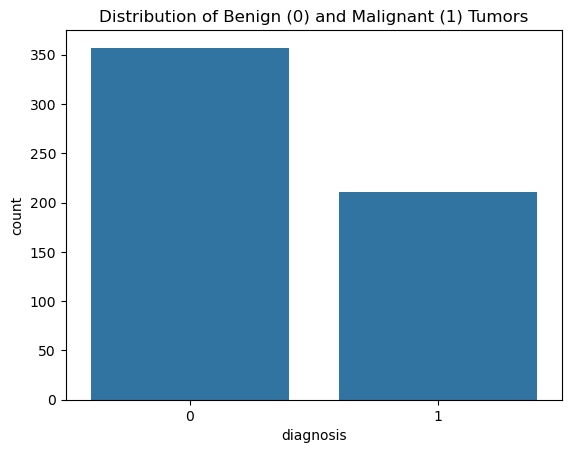

In [24]:
# View distribution of diagnosis classes
sns.countplot(x=df['diagnosis'])
plt.title('Distribution of Benign (0) and Malignant (1) Tumors')
plt.show()


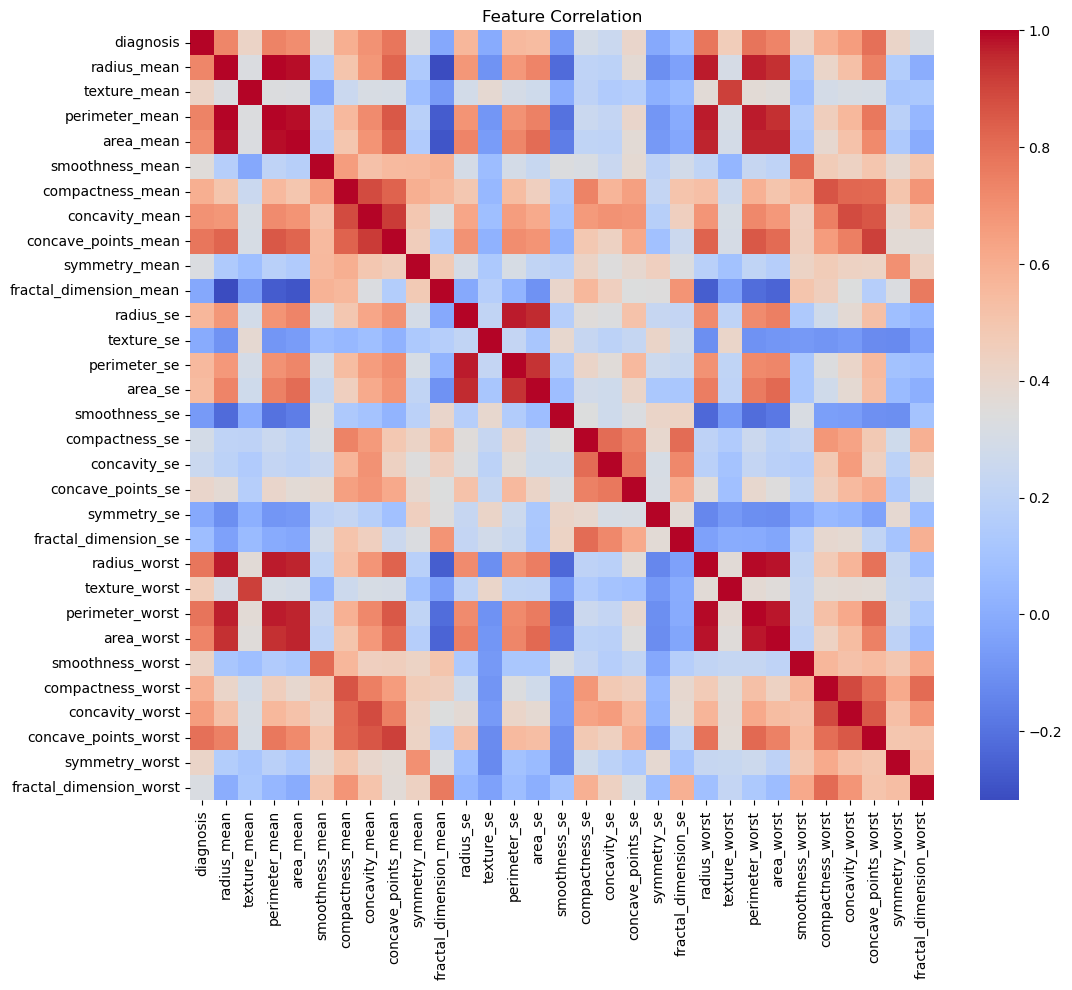

In [25]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation")
plt.show()

Feature Engineering

In [26]:
# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Scale features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [27]:
# Separate input features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [28]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [29]:
# Select top 10 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_kbest = selector.fit_transform(X_scaled, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print("Top 10 selected features:\n", selected_features)



Top 10 selected features:
 Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave_points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave_points_worst'],
      dtype='object')


Step 3: Split Data into Training, Validation, and Testing

In [30]:
# First split: train (70%) vs temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_kbest, y, test_size=0.30, random_state=42)

# Second split: validation (15%) vs test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Check sizes
print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)


Train: (397, 10) Validation: (85, 10) Test: (86, 10)


Using Container Technology in SageMaker Studio Lab

In [31]:
import sagemaker
from sagemaker import get_execution_role

sagemaker_session = sagemaker.Session()
role = get_execution_role()
role


sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix


'arn:aws:iam::173534767361:role/datazone_usr_role_dagm3t0720slyh_6k1l9wemg3o0fd'

In [32]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [33]:
import os

# Create directory if it doesn't exist
os.makedirs('app/model', exist_ok=True)

# Save model, scaler, and features
joblib.dump(model, 'app/model/breast_cancer_model.pkl')
joblib.dump(scaler, 'app/model/scaler.pkl')
joblib.dump(selected_features.tolist(), 'app/model/selected_features.pkl')



['app/model/selected_features.pkl']

In [11]:
import joblib

# Load
model_loaded = joblib.load("app/model/breast_cancer_model.pkl")
scaler_loaded = joblib.load("app/model/scaler.pkl")
features_loaded = joblib.load("app/model/selected_features.pkl")

# Verify
print(" Model Type:", type(model_loaded))
print("Scaler Type:", type(scaler_loaded))
print("Selected Features:", features_loaded)


 Model Type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Scaler Type: <class 'sklearn.preprocessing._data.StandardScaler'>
Selected Features: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave_points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave_points_worst']


In [12]:
import pandas as pd

bucket_name = "amazon-sagemaker-173534767361-us-east-2-d5362bfde7f6"
object_key = "Breast-Cancer-Prediction/wdbc.data"
s3_uri = f"s3://{bucket_name}/{object_key}"

df = pd.read_csv(s3_uri, header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
script_path = "src/Breast_Cancer_container/train.py"  # if your training logic is in a train.py file


In [ ]:
script_path = "src/wine_quality_container/train.py"

In [33]:

from sagemaker.sklearn.estimator import SKLearn
from sagemaker.inputs import TrainingInput
from sagemaker import get_execution_role, Session

# Step 0: Set up SageMaker session and role
sagemaker_session = Session()
role = get_execution_role()
bucket = sagemaker_session.default_bucket()

# Step 1: Correct dataset location in S3
train_input = TrainingInput(
    s3_data=f's3://{bucket}/Breast-Cancer-Prediction/wdbc.data',
    content_type='csv'
)

# Step 2: Define the training job
sklearn = SKLearn(
    entry_point='train.py',
    source_dir='Breast_Cancer_container',  #  Updated path
    instance_type='ml.m5.large',
    framework_version='0.20.0',
    py_version='py3',
    role=role,
    sagemaker_session=sagemaker_session
)

# Step 3: Start training
print("Starting training...")
sklearn.fit({'train': train_input})

# Step 4: Deploy the trained model using inference.py
print("Deploying...")
predictor = sklearn.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.large',
    entry_point='inference.py',
    source_dir='Breast_Cancer_container'  # updated path
)


sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
sagemaker.config INFO - Applied value from config key = SageMaker.TrainingJob.VpcConfig.Subnets
sagemaker.config INFO - Applied value from config key = SageMaker.TrainingJob.VpcConfig.SecurityGroupIds
Starting training...
2025-05-30 17:29:16 Starting - Starting the training job...
2025-05-30 17:29:46 Downloading - Downloading input data...
2025-05-30 17:30:12 Downloading - Downloading the training image.....2025-05-30 17:30:54,917 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2025-05-30 17:30:54,920 sagem

In [34]:
import boto3
import json

# Example input using your selected 10 features
sample = {
    "feature_1": 15.3,
    "feature_3": 102.5,
    "feature_4": 710.0,
    "feature_6": 0.15,
    "feature_7": 0.08,
    "feature_21": 17.0,
    "feature_23": 110.0,
    "feature_24": 900.0,
    "feature_26": 0.2,
    "feature_27": 0.1
}

# Wrap input in a list of dicts to simulate a batch (SageMaker expects records)
payload = json.dumps([sample])

# Replace with your actual endpoint name
endpoint_name = "sagemaker-scikit-learn-2025-05-30-17-32-01-209"

# Create predictor client
runtime = boto3.client('sagemaker-runtime')

# Invoke endpoint
response = runtime.invoke_endpoint(
    EndpointName=endpoint_name,
    ContentType='application/json',
    Body=payload
)

# Output the prediction
print(response['Body'].read().decode())


['Benign']


In [2]:
import joblib

features = joblib.load("Breast_Cancer_container/app/model/selected_features.pkl")
print(features)


['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave_points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave_points_worst']
